# TEST 1
Koristeći jupyter lab, kompletirati definirane zadatake u nastavku!<br>
Kompajlirani jupyter notebook uploadovati kao rješenje zadatka.

----------
#### ZADATAK 1: 
Preuzeti fotografiju koristeći link:
https://source.unsplash.com/random/1000×1000/?colorful,toy
<br>Snimiti fotografiju pod nazivom fotografija1

----------
#### ZADATAK 2: 
Otvorite preuzetu fotografiju i prikažite je u notebook-u. 
<br>Koristite ispravan RGB prostor boje.

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

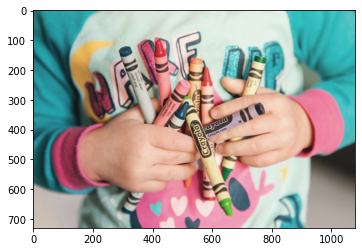

In [5]:
slika = cv2.imread("fotografija1.jpg")
slika_rgb = cv2.cvtColor(slika, cv2.COLOR_BGR2RGB)
plt.imshow(slika_rgb)

----------
#### ZADATAK 3: 
Ispišite dimenzije fotografije.

In [6]:
slika_rgb.shape

(730, 1080, 3)

----------
#### ZADATAK 4: 
Prikažite izolirani PLAVI kanal fotografije.

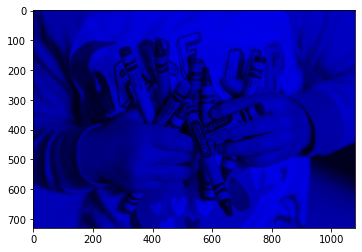

In [7]:
slika_plava = slika_rgb.copy()
slika_plava[:,:,0] = 0
slika_plava[:,:,1] = 0
plt.imshow(slika_plava)

----------
#### ZADATAK 5: 
Iscrtati prazan crveni pravugaonik u središtu fotografije i prikazati rezultujuću fotografiju u notebook-u.

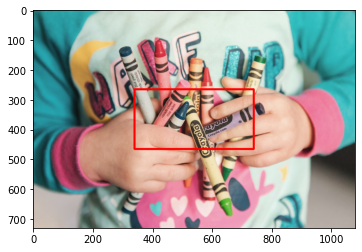

In [14]:
nova_slika = slika_rgb.copy()
h, w, c = nova_slika.shape
hs = h // 2
ws = w // 2
cv2.rectangle(nova_slika, (ws-200,hs-100), (ws+200,hs+100), (255,0,0), thickness=5)
plt.imshow(nova_slika)

----------
#### ZADATAK 6:  
Kreirajte skriptu koja če otvoriti sliku i omogućiti da se crtaju prazni crveni krugovi po slici svaki put kada se klikne DESNI KLIK MIŠA (GORE).

In [5]:
import os
os.system(f'python script.py')

0

----------
#### ZADATAK 7:  
a) Primjeniti TRESHOLD i ADAPTIVE_TRASHOLD filtere na preuzetu fotografiju.<br>
b) Kombinirati (blending) novodbivene fotografije u novu fotografiju.<br>
c) Ispisati fotografiju nakon svakog koraka.

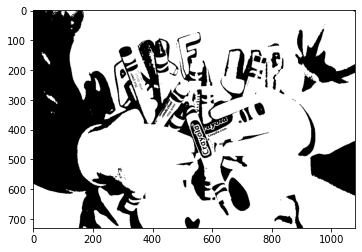

In [21]:
slika2 = cv2.imread("fotografija1.jpg", 0)
ret, th1 = cv2.threshold(slika2, 127, 255, cv2.THRESH_BINARY)
plt.imshow(th1, cmap="gray")

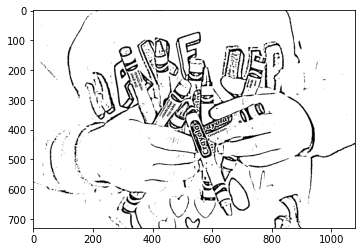

In [22]:
th2 = cv2.adaptiveThreshold(slika2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
plt.imshow(th2, cmap="gray")

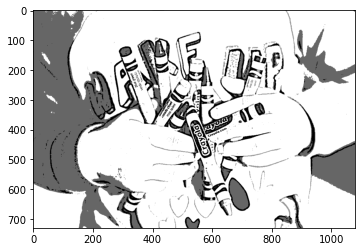

In [32]:
nova_slika2 = cv2.addWeighted(src1=th1, alpha=0.6, src2=th2, beta=0.4, gamma=0)
plt.imshow(nova_slika2, cmap="gray")

----------
#### ZADATAK 8:  
Kreirati Vertikalni Sobel Filter (sobely sa vježbi) sa kernelom veličine 5 na crnobijelu verziju preuzete fotografije i prikažite rezultujuću fotografiju.

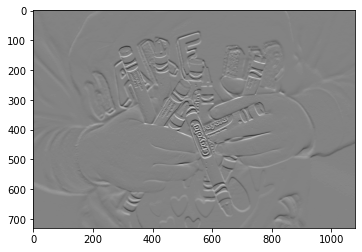

In [23]:
slika3 = cv2.imread("fotografija1.jpg", 0)
sobely = cv2.Sobel(slika3, cv2.CV_64F,0,1,ksize=5)
plt.imshow(sobely, cmap="gray")

----------
#### ZADATAK 9:   
Krirajte color histogram za RED i GREEN kanale preuzete fotografije.


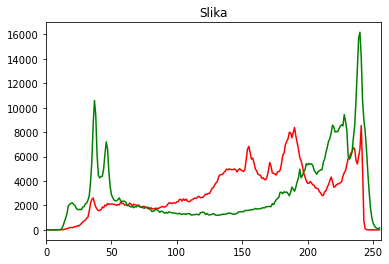

In [27]:
slika4 = cv2.imread("fotografija1.jpg")
slika4_rgb = cv2.cvtColor(slika4, cv2.COLOR_BGR2RGB)
red = 'r'
green = 'g'
histogram = cv2.calcHist([slika4],[1],None,[256],[0,256])
plt.plot(histogram, color="r")
plt.xlim([0,256])
histogram = cv2.calcHist([slika4],[2],None,[256],[0,256])
plt.plot(histogram, color="g")
plt.xlim([0,256])
plt.title("Slika")
plt.show()

----------
#### ZADATAK 10:   
Kreirati program koji učitava live video stream sa Vaše kamere.
<br>Kada god kliknete lijevim mišem, kreirati plavi krug.
<br>Snimiti testni video sa niazivom ime_prezime.

In [9]:
def crtanje_kruga(event,x,y,flags,param):
    global centar, kliknuto
    if event == cv2.EVENT_LBUTTONDOWN:
        centar = (x,y)
        kliknuto = True
    
centar = (0,0)
kliknuto = False
cap = cv2.VideoCapture(0)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
writer = cv2.VideoWriter("ajdin_bukvic.mp4", cv2.VideoWriter_fourcc(*"VIDX"),25,(w,h))
cv2.namedWindow("Test1")
cv2.setMouseCallback("Test1", crtanje_kruga)

while True:
    ret, frame = cap.read()
    if kliknuto == True:
        cv2.circle(frame, centar, radius=30, color=(255,0,0), thickness=-1)
    cv2.imshow("Test1", frame)
    writer.write(frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
cap.release()
writer.release()
cv2.destroyAllWindows()